In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock , start , end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2022-12-14,94.600479,96.496264,93.240683,94.828770,26452900
2022-12-15,90.521072,93.330007,89.756808,92.843657,28298800
2022-12-16,90.183609,91.066983,89.339938,90.521074,48485500
2022-12-19,88.486336,90.521070,88.263012,90.203453,23020500
2022-12-20,88.962769,89.111653,87.384609,88.069474,21976800


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449751,16.517488,16.127385,16.141478,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291538,16.414156,16.222813,16.368669,131808205
3,2012-01-06,16.069296,16.316013,16.063609,16.294999,108119746
4,2012-01-09,15.387976,15.994635,15.357568,15.982273,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.600479,96.496264,93.240683,94.828770,26452900
2757,2022-12-15,90.521072,93.330007,89.756808,92.843657,28298800
2758,2022-12-16,90.183609,91.066983,89.339938,90.521074,48485500


In [6]:
data.loc[2760]

Price   Ticker
Date              2022-12-20 00:00:00
Close   GOOG                88.962769
High    GOOG                89.111653
Low     GOOG                87.384609
Open    GOOG                88.069474
Volume  GOOG                 21976800
Name: 2760, dtype: object

In [7]:
ma_100_days = data.Close.rolling(100).mean()

# A moving average (MA) in the stock market is a technical analysis tool that
# smooths out price data by creating a constantly updated average price over a specific period

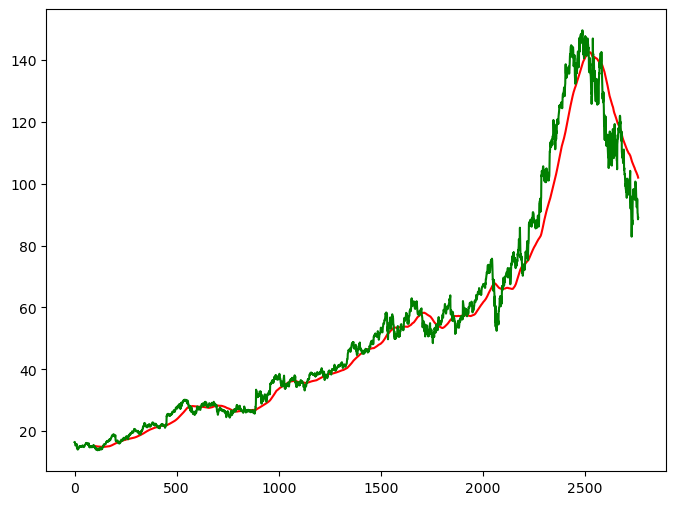

C:\Users\HARSH PRATAP SINGH\AppData\Local\Temp\ipykernel_26784\1388415728.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


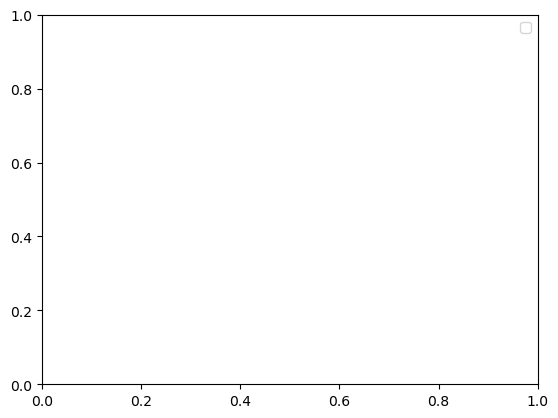

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close , 'g')
plt.show()
plt.legend()

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)]) # 80 percent train
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)]) # 80 percent test 

In [12]:
data_train.shape[0]

2208

In [13]:
data_test.shape[0]

553

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # fit data between 0 and 1 

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100 , data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
!pip install keras

In [18]:
!pip install tensorflow

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential # used to predict data based on timeseries 

c:\Users\HARSH PRATAP SINGH\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [20]:
x, y = np.array(x) , np.array(y)

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\HARSH PRATAP SINGH\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1) #50 times data will be pushed and each time 32 rows will be taken 

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 0.0400
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0073
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0061
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0055
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0046
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0046
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0046
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0046
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0040
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0040
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0038
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0039
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0040
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0034
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0032
Epoc

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [27]:
data_test_scale = scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100 , data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step


In [30]:
y_predict

array([[0.14771834],
       [0.146985  ],
       [0.14689   ],
       [0.14736691],
       [0.14839208],
       [0.14996102],
       [0.15200628],
       [0.15444165],
       [0.15720871],
       [0.16027614],
       [0.16364099],
       [0.16724795],
       [0.17102747],
       [0.17481063],
       [0.17845443],
       [0.18190399],
       [0.18514355],
       [0.18822187],
       [0.19130959],
       [0.19456196],
       [0.19809668],
       [0.20195118],
       [0.20611873],
       [0.21058452],
       [0.21529806],
       [0.22021952],
       [0.22528794],
       [0.23042892],
       [0.23549336],
       [0.24037962],
       [0.24499121],
       [0.24922068],
       [0.25303006],
       [0.25638446],
       [0.25931227],
       [0.26183733],
       [0.2640168 ],
       [0.26598185],
       [0.26788953],
       [0.26990017],
       [0.27205038],
       [0.2743075 ],
       [0.2766067 ],
       [0.278911  ],
       [0.2811824 ],
       [0.28329727],
       [0.28510705],
       [0.286

In [31]:
scaler.scale_

array([0.01218053])

In [32]:
scale = 1/scaler.scale_

In [33]:
y_predict = y_predict*scale

In [34]:
y = y*scale

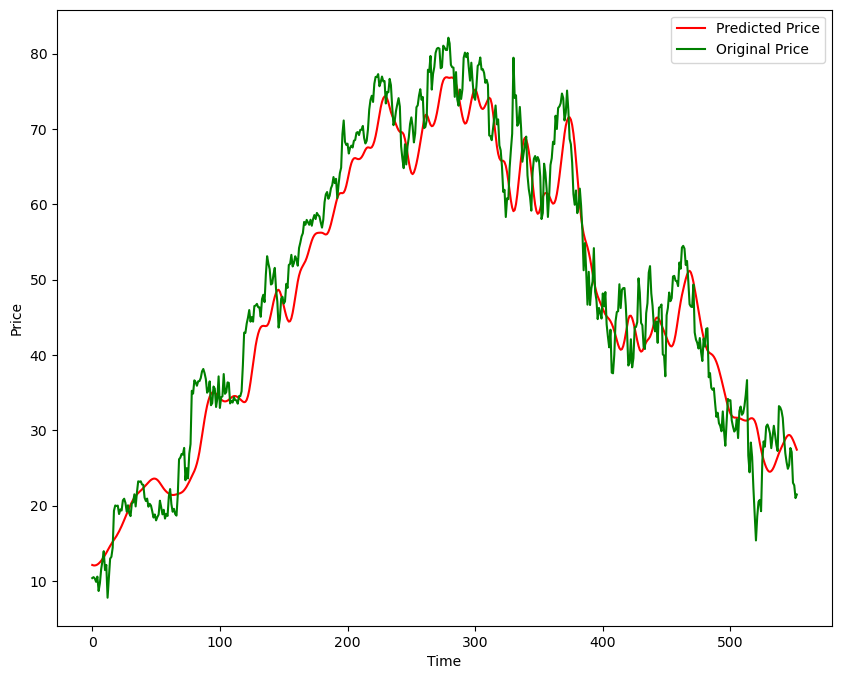

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
model.save('Stock Prediction Model.keras')